1. load 'iris_data.csv' into a dataframe
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function
6. create a new scatter plot where each flower is colored according to cluster label
7. add a dot for the cluster centers
8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)


In [75]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import estimate_bandwidth, MeanShift
import matplotlib.pyplot as plt
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


In [51]:
species = list(set(iris['Species']))
print(species)

['I. versicolor', 'I. setosa', 'I. virginica']


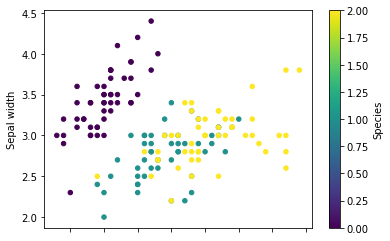

In [52]:
label_enc =preprocessing.LabelEncoder()
iris['Species'] = label_enc.fit_transform(iris['Species'].astype(str))
iris.plot.scatter(x='Sepal length', y='Sepal width',c='Species', colormap='viridis')

In [56]:
bandwidth = estimate_bandwidth(iris, quantile=0.2)
analyzer = MeanShift(bandwidth = bandwidth) 
analyzer.fit(iris)

MeanShift(bandwidth=0.9714028141871647, bin_seeding=False, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [71]:
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_
count_clusters = len(set(labels))
print('Labels: \n', labels)
print('Cluster centers: \n', cluster_centers)
print('Number of clusters: \n', count_clusters)

Labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Cluster centers: 
 [[4.98510638 3.41914894 1.47021277 0.24255319 0.        ]
 [5.93809524 2.79047619 4.29761905 1.33809524 1.        ]
 [6.37567568 2.95945946 5.36216216 2.04324324 2.        ]]
Number of clusters: 
 3


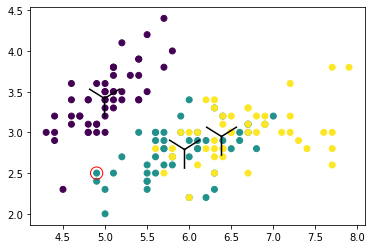

In [92]:
plt.scatter(iris['Sepal length'], iris['Sepal width'], c=labels)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker='1', color="black", s=1500)
plt.scatter(4.9, 2.5, s=150, facecolors='none', edgecolors='r')

In [87]:
#Node within the circle is different when meanshift color the node.